## Traveloka Data Challenge

## Problem Statement

Create recommendation and strategy to reduce customer churn

Customer churn = customer who haven’t bought in the last one year from
last_updated_date in the dataset

last_updated_date = ‘2019-02-01’

## Metadata

Profile_id = hashed identity of a customer. One profile id represents one customer [integer 64]

Primary_sales_product = the product identifier [{‘FLIGHT’, ‘HOTEL’, ‘TRAIN’, ‘TRIP’}]

first_booking_time = is the first time the customer booked a product in primary_sales_product
[unix timestamp in milliseconds]

First_issued_time = is the first time the customer issued a product in primary_sales_product
[unix timestamp in milliseconds]

Last_booking_time = is the last time the customer booked a product in primary_sales_product
[unix timestamp in milliseconds]

Last_issued_time = is the first time the customer issued a product in primary_sales_product
[unix timestamp in milliseconds]

Avg_booking_invoice = avg invoice amount in submitted booking [in IDR]

Avg_issued_invoice = avg invoice amount in issuance [in IDR]

Count_booking = total count of bookings of that particular product (from the day they were
acquired until now) [integer]

Count_issued = total count of issuance of that particular product (from the day they were
acquired until now) [integer]

## Data Analysis

In [0]:
import pandas as pd
from datetime import datetime
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
from google.colab import files
uploaded = files.upload()


MessageError: ignored

In [0]:
data = pd.read_csv('dsda_case_study_2019.csv')

In [13]:
data

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number
0,3632279,HOTEL,1436705255370,1.466304e+12,1538717915528,1.538718e+12,2.000823e+06,1.193237e+06,32,18,0.001562
1,3632279,FLIGHT,1405686647701,1.406077e+12,1545735395212,1.545736e+12,1.174169e+06,1.031982e+06,58,33,0.001562
2,17407638,TRAIN,1493348364000,1.493349e+12,1548320804000,1.548323e+12,2.848843e+05,2.527762e+05,62,24,0.004267
3,17407638,HOTEL,1493361893998,1.493362e+12,1547642393838,1.547644e+12,7.374472e+05,5.875060e+05,36,22,0.004267
4,4618047,FLIGHT,1420511473189,1.429178e+12,1546763512498,1.542891e+12,1.604698e+06,1.443118e+06,53,20,0.002460
5,4618047,TRAIN,1517758659000,1.519219e+12,1542989115000,1.542989e+12,2.337906e+05,2.425816e+05,43,18,0.002460
6,8037035,FLIGHT,1454653875311,1.454659e+12,1542967991690,1.542968e+12,1.657049e+06,1.730721e+06,88,58,0.002321
7,5008200,FLIGHT,1425786790237,1.426154e+12,1535071494294,1.535076e+12,9.184614e+05,7.272530e+05,28,17,0.001845
8,4850495,FLIGHT,1423724205834,1.423737e+12,1549022788242,1.540999e+12,1.785722e+06,1.792605e+06,161,101,0.001071
9,3153281,FLIGHT,1392880470937,1.405249e+12,1547979240528,1.545289e+12,1.065314e+06,9.865735e+05,181,72,0.004817


In [0]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [15]:
display_all(data.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
profile_id,279149,NaN,NaN,NaN,2.30031e+07,2.34189e+07,80027,7.83641e+06,1.5003e+07,2.36144e+07,1.04084e+08
primary_sales_product_type,279149,4,FLIGHT,136661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_booking_time,279149,NaN,NaN,NaN,1.49355e+12,3.71408e+10,1.36273e+12,1.47059e+12,1.49951e+12,1.52229e+12,1.54906e+12
first_issued_time,206554,NaN,NaN,NaN,1.49536e+12,3.56373e+10,1.36427e+12,1.47315e+12,1.50076e+12,1.52317e+12,1.54906e+12
last_booking_time,279149,NaN,NaN,NaN,1.51578e+12,3.16063e+10,1.36273e+12,1.499e+12,1.52493e+12,1.54148e+12,1.54907e+12
last_issued_time,206554,NaN,NaN,NaN,1.51787e+12,2.91826e+10,1.36626e+12,1.50148e+12,1.52638e+12,1.54163e+12,1.54907e+12
avg_booking_invoice_amount_idr,279149,NaN,NaN,NaN,1.2327e+06,3.24619e+06,-827572,412143,770905,1.37823e+06,7.94092e+08
avg_issued_invoice_amount_idr,206554,NaN,NaN,NaN,1.11807e+06,1.48477e+06,0,408061,753152,1.31023e+06,8.8993e+07
count_booking,279149,NaN,NaN,NaN,10.8345,28.8309,1,1,3,10,4308
count_issued,279149,NaN,NaN,NaN,5.16525,17.7412,0,0,1,4,3132


#### From the above table we can infer the following at a high level:

    1. The number of records for first_issued_time , last_issued_time & 
       avg_issued_invoice_amount_idr are 206554. There are null values in these columns.
    2. avg_booking_invoice_amount_idr minimim value is negative. This may be a system error.
    3. random_number column may not be useful for our analysis, so can be removed for this study.
    

#### Dropping random_number column

In [0]:
data_cleaned = data.drop('random_number',axis=1)

#### Checking for Null value columns

In [17]:
display_all(data_cleaned.isnull().sum().sort_index()/len(data)*100)

avg_booking_invoice_amount_idr     0.000000
avg_issued_invoice_amount_idr     26.005825
count_booking                      0.000000
count_issued                       0.000000
first_booking_time                 0.000000
first_issued_time                 26.005825
last_booking_time                  0.000000
last_issued_time                  26.005825
primary_sales_product_type         0.000000
profile_id                         0.000000
dtype: float64

From the above table it is clear that variables **avg_issued_invoice_amount_idr, first_issued_time,last_issued_time** are having **26.005825%** records as NULL values. We can eliminate them from our analysis for accuracy reasons.

In [0]:
data_cleaned = data_cleaned[pd.notnull(data['avg_issued_invoice_amount_idr'])]

#### Checking for Null values records

In [19]:
display_all(data_cleaned.isnull().sum().sort_index()/len(data)*100)

avg_booking_invoice_amount_idr    0.0
avg_issued_invoice_amount_idr     0.0
count_booking                     0.0
count_issued                      0.0
first_booking_time                0.0
first_issued_time                 0.0
last_booking_time                 0.0
last_issued_time                  0.0
primary_sales_product_type        0.0
profile_id                        0.0
dtype: float64

In [20]:
display_all(data_cleaned.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
profile_id,206554,NaN,NaN,NaN,2.16032e+07,2.22382e+07,80027,7.45089e+06,1.42765e+07,2.26398e+07,1.04078e+08
primary_sales_product_type,206554,4,FLIGHT,103840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_booking_time,206554,NaN,NaN,NaN,1.49176e+12,3.70141e+10,1.36298e+12,1.46854e+12,1.49793e+12,1.52022e+12,1.54906e+12
first_issued_time,206554,NaN,NaN,NaN,1.49536e+12,3.56373e+10,1.36427e+12,1.47315e+12,1.50076e+12,1.52317e+12,1.54906e+12
last_booking_time,206554,NaN,NaN,NaN,1.52035e+12,2.84116e+10,1.36626e+12,1.50487e+12,1.52958e+12,1.54329e+12,1.54907e+12
last_issued_time,206554,NaN,NaN,NaN,1.51787e+12,2.91826e+10,1.36626e+12,1.50148e+12,1.52638e+12,1.54163e+12,1.54907e+12
avg_booking_invoice_amount_idr,206554,NaN,NaN,NaN,1.17691e+06,1.64367e+06,0,434546,799252,1.37592e+06,1.91528e+08
avg_issued_invoice_amount_idr,206554,NaN,NaN,NaN,1.11807e+06,1.48477e+06,0,408061,753152,1.31023e+06,8.8993e+07
count_booking,206554,NaN,NaN,NaN,13.8472,32.9356,1,2,5,14,4308
count_issued,206554,NaN,NaN,NaN,6.98061,20.315,1,1,2,6,3132


#### Find the number of Unique Customers

In [21]:
len(data_cleaned['profile_id'].unique())

128791

In [22]:
data_cleaned[data_cleaned['profile_id']==9271887]

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued
226976,9271887,TRAIN,1498487480000,1.498488e+12,1533636281000,1.533637e+12,179587.750000,261959.250000,8,4
226977,9271887,TRAIN,1498487480000,1.498488e+12,1533636281000,1.533637e+12,179587.750000,261959.250000,8,4
252477,9271887,FLIGHT,1479262144566,1.483797e+12,1484361322621,1.484362e+12,664273.222222,694741.571429,9,7
252478,9271887,FLIGHT,1479262144566,1.483797e+12,1484361322621,1.484362e+12,664273.222222,694741.571429,9,7
275178,9271887,HOTEL,1462269530503,1.462271e+12,1547870854925,1.547871e+12,356243.083333,395521.071429,24,14
275179,9271887,HOTEL,1462269530503,1.462271e+12,1547870854925,1.547871e+12,356243.083333,395521.071429,24,14


In [23]:
data_cleaned['profile_id'].value_counts()

4923950      8
3761503      8
68341382     8
22624339     8
12537973     8
6579598      8
7047106      8
14836993     8
8387087      8
6522751      6
15639107     6
5530292      6
30018939     6
22517884     6
6473448      6
9571800      6
6161720      6
3478654      6
1514521      6
29910695     6
36217139     6
3999223      6
12169053     6
12148112     6
17382059     6
10552909     6
4218128      6
5918642      6
9895461      6
9271887      6
            ..
98467244     1
13220994     1
5616771      1
58821764     1
4299910      1
23969620     1
96944726     1
27077776     1
10822801     1
9773569      1
16629415     1
53351543     1
7216246      1
13748059     1
6730851      1
29931381     1
23261662     1
13065310     1
4228979      1
24554592     1
75938914     1
16285548     1
16639839     1
100943723    1
69492584     1
10139988     1
3339371      1
7087975      1
16016835     1
19140610     1
Name: profile_id, Length: 128791, dtype: int64

In [24]:
len(pd.unique(data_cleaned[['profile_id','primary_sales_product_type','first_booking_time']].values.ravel()))

334781

In [0]:
group = data_cleaned.groupby('primary_sales_product_type')

In [0]:
df2 = group.apply(lambda x: len(x['profile_id'].unique()))

#### Number of Customers by Product Type

In [27]:
customer_product = data_cleaned[['primary_sales_product_type','profile_id']].drop_duplicates()
customer_product.groupby(['primary_sales_product_type'])['profile_id'].aggregate('count').reset_index().sort_values('profile_id', ascending=False)

,primary_sales_product_type,profile_id
0,FLIGHT,103624
1,HOTEL,66028
2,TRAIN,32601
3,TRIP,3754


 Based on the above table it is clear that more than **50%** of the customers book flight tickets followed by hotel, train and trip.

In [0]:
data.primary_sales_product_type = data.primary_sales_product_type.astype('category')     

In [29]:
data.primary_sales_product_type.cat.reorder_categories

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.arrays.categorical.CategoricalAccessor object at 0x7fe7cc3a4710>>

#### Converting unix timestamp to Date

In [0]:
#Converting the timestamp to UTC timestamp for reducing ambiguity
data_cleaned['first_booking_time_cleaned']=(pd.to_datetime(data_cleaned['first_booking_time'],unit='ms')) 
data_cleaned['first_issued_time_cleaned']=(pd.to_datetime(data_cleaned['first_issued_time'],unit='ms')) 
data_cleaned['last_booking_time_cleaned']=(pd.to_datetime(data_cleaned['last_booking_time'],unit='ms')) 
data_cleaned['last_issued_time_cleaned']=(pd.to_datetime(data_cleaned['last_issued_time'],unit='ms')) 

#### Calculate the time for which the customer is with Traveloka

In [0]:
data_cleaned['Last_Issue_Minus_First_Issue'] = (data_cleaned['last_issued_time_cleaned'] - data_cleaned['first_issued_time_cleaned']).dt.days

#### Calculate Churn variable

In [0]:
data_cleaned["Date_From_Last_Updated"]=[int(i.days) for i in (pd.Timestamp("2019-02-01") - data_cleaned['last_issued_time_cleaned'])]

In [0]:
data_cleaned['Churn_Flag'] = np.where(data_cleaned['Date_From_Last_Updated']>365,1,0)

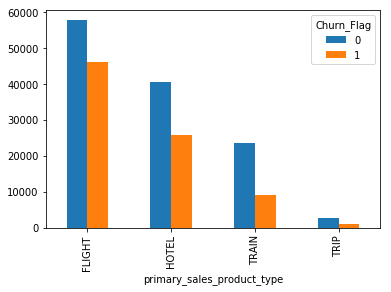

In [34]:
data_cleaned.groupby('primary_sales_product_type').Churn_Flag.value_counts().unstack().plot.bar()

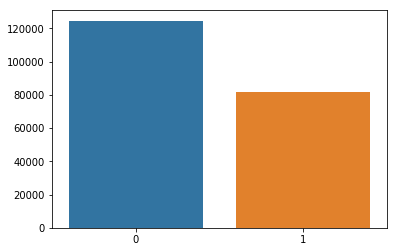

In [35]:
y = data_cleaned["Churn_Flag"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [36]:
y_True = data_cleaned["Churn_Flag"][data_cleaned["Churn_Flag"] == 1]
print ("Churn Percentage = "+str( (y_True.shape[0] / data_cleaned["Churn_Flag"].shape[0]) * 100 ))

Churn Percentage = 39.68066462038983


#### Calculating the count of Payment failures and Cancellations

The difference between the Booking Count and Issue count would give us count of cancellations or payment failures.

In [0]:
data_cleaned['count_Booking_Minus_Issue'] = data_cleaned['count_booking'] - data_cleaned['count_issued']

In [38]:
data_cleaned.groupby(['primary_sales_product_type'])['count_Booking_Minus_Issue'].aggregate('median').reset_index().sort_values('count_Booking_Minus_Issue', ascending=False)

,primary_sales_product_type,count_Booking_Minus_Issue
1,HOTEL,3
0,FLIGHT,2
2,TRAIN,2
3,TRIP,1


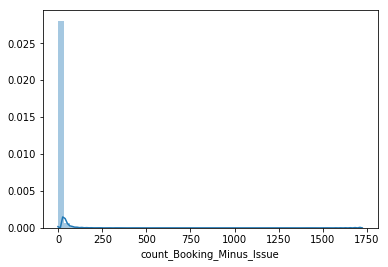

In [39]:
sns.distplot(data_cleaned['count_Booking_Minus_Issue'])

In [0]:
data_cleaned['Tota_Issue_Amount'] = data_cleaned['count_issued']*data_cleaned['avg_issued_invoice_amount_idr']

In [41]:
data_cleaned.groupby(['primary_sales_product_type'])['Tota_Issue_Amount'].aggregate('median').reset_index().sort_values('Tota_Issue_Amount', ascending=False)

,primary_sales_product_type,Tota_Issue_Amount
0,FLIGHT,3553613.0
3,TRIP,3420139.0
1,HOTEL,1371121.5
2,TRAIN,580652.0


In [0]:
data_cleaned['diff_first_last_booking'] = (data_cleaned['last_booking_time_cleaned'] - data_cleaned['first_booking_time_cleaned']).dt.days

In [43]:
data_cleaned.groupby(['primary_sales_product_type'])['diff_first_last_booking'].aggregate('median').reset_index().sort_values('diff_first_last_booking', ascending=False)

,primary_sales_product_type,diff_first_last_booking
0,FLIGHT,213
1,HOTEL,180
2,TRAIN,69
3,TRIP,0


In [0]:
data_cleaned['diff_first_last_issue'] = (data_cleaned['last_issued_time_cleaned'] - data_cleaned['first_issued_time_cleaned']).dt.days

In [45]:
data_cleaned.groupby(['primary_sales_product_type'])['diff_first_last_issue'].aggregate('median').reset_index().sort_values('diff_first_last_issue', ascending=False)

,primary_sales_product_type,diff_first_last_issue
0,FLIGHT,108
1,HOTEL,47
2,TRAIN,8
3,TRIP,0


In [0]:
data_cleaned['frequency_of_issue'] = data_cleaned['diff_first_last_issue'] / data_cleaned['count_issued']

In [47]:
data_cleaned.groupby(['primary_sales_product_type'])['frequency_of_issue'].aggregate('median').reset_index().sort_values('frequency_of_issue', ascending=False)

,primary_sales_product_type,frequency_of_issue
0,FLIGHT,17.460648
1,HOTEL,12.545455
2,TRAIN,3.333333
3,TRIP,0.000000


In [0]:
data_cleaned['frequency_of_booking'] = data_cleaned['diff_first_last_booking'] / data_cleaned['count_booking']

In [49]:
data_cleaned.groupby(['primary_sales_product_type'])['frequency_of_booking'].aggregate('median').reset_index().sort_values('frequency_of_booking', ascending=False)

,primary_sales_product_type,frequency_of_booking
0,FLIGHT,18.319091
1,HOTEL,16.400000
2,TRAIN,7.000000
3,TRIP,0.000000


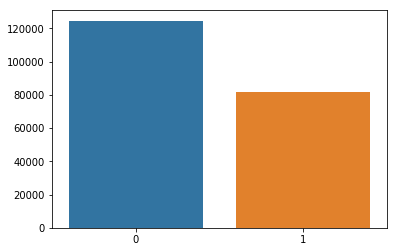

In [50]:
y = data_cleaned["Churn_Flag"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [0]:
data_cleaned['Most_Likely_Churn'] = np.where(data_cleaned['Date_From_Last_Updated']>270,1,0)

In [0]:
data_cleaned['Moderate_Likely_Churn'] = np.where(data_cleaned['Date_From_Last_Updated']>180,1,0)

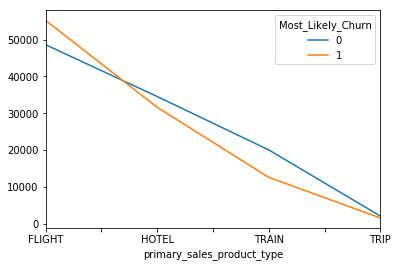

In [53]:
data_cleaned.groupby('primary_sales_product_type').Most_Likely_Churn.value_counts().unstack().plot.line()

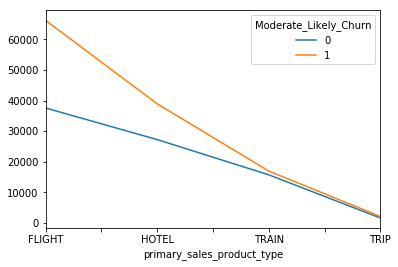

In [55]:
data_cleaned.groupby('primary_sales_product_type').Moderate_Likely_Churn.value_counts().unstack().plot.line()

#### One-hot Encoding the Categoical Product Type variable

In [56]:
X = data_cleaned.drop(['profile_id','first_booking_time',
                        'first_issued_time','last_booking_time','last_issued_time','Churn_Flag','first_booking_time_cleaned',
 'first_issued_time_cleaned',
 'last_booking_time_cleaned',
 'last_issued_time_cleaned','Most_Likely_Churn','Moderate_Likely_Churn'], axis=1)
target = data_cleaned['Churn_Flag']
target = np.array(target)
display(X.head())

,primary_sales_product_type,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,Last_Issue_Minus_First_Issue,Date_From_Last_Updated,count_Booking_Minus_Issue,Tota_Issue_Amount,diff_first_last_booking,diff_first_last_issue,frequency_of_issue,frequency_of_booking
0,HOTEL,2.000823e+06,1.193237e+06,32,18,838,118,14,21478262.0,1180,838,46.555556,36.875000
1,FLIGHT,1.174169e+06,1.031982e+06,58,33,1616,37,25,34055395.0,1620,1616,48.969697,27.931034
2,TRAIN,2.848843e+05,2.527762e+05,62,24,636,7,38,6066628.0,636,636,26.500000,10.258065
3,HOTEL,7.374472e+05,5.875060e+05,36,22,628,15,14,12925131.0,628,628,28.545455,17.444444
4,FLIGHT,1.604698e+06,1.443118e+06,53,20,1316,70,33,28862366.0,1461,1316,65.800000,27.566038


In [57]:
display(y.head())

0    124592
1     81962
Name: Churn_Flag, dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label = LabelEncoder()
X['primary_sales_product_type'] = label.fit_transform(X['primary_sales_product_type'])
print(X['primary_sales_product_type'].head(7))

0    1
1    0
2    2
3    1
4    0
5    2
6    0
Name: primary_sales_product_type, dtype: int64


In [0]:
X_dummies = pd.get_dummies(X['primary_sales_product_type'], prefix='product')

In [0]:
X = pd.concat([X, X_dummies], axis=1)

In [0]:
X = X.drop(['primary_sales_product_type'],axis=1)

In [62]:
X.head(5)

,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,Last_Issue_Minus_First_Issue,Date_From_Last_Updated,count_Booking_Minus_Issue,Tota_Issue_Amount,diff_first_last_booking,diff_first_last_issue,frequency_of_issue,frequency_of_booking,product_0,product_1,product_2,product_3
0,2.000823e+06,1.193237e+06,32,18,838,118,14,21478262.0,1180,838,46.555556,36.875000,0,1,0,0
1,1.174169e+06,1.031982e+06,58,33,1616,37,25,34055395.0,1620,1616,48.969697,27.931034,1,0,0,0
2,2.848843e+05,2.527762e+05,62,24,636,7,38,6066628.0,636,636,26.500000,10.258065,0,0,1,0
3,7.374472e+05,5.875060e+05,36,22,628,15,14,12925131.0,628,628,28.545455,17.444444,0,1,0,0
4,1.604698e+06,1.443118e+06,53,20,1316,70,33,28862366.0,1461,1316,65.800000,27.566038,1,0,0,0


In [79]:
X.columns

Index(['avg_booking_invoice_amount_idr', 'avg_issued_invoice_amount_idr',
       'count_booking', 'count_issued', 'Last_Issue_Minus_First_Issue',
       'Date_From_Last_Updated', 'count_Booking_Minus_Issue',
       'Tota_Issue_Amount', 'diff_first_last_booking', 'diff_first_last_issue',
       'frequency_of_issue', 'frequency_of_booking', 'product_0', 'product_1',
       'product_2', 'product_3'],
      dtype='object')

In [63]:
X.shape

(206554, 16)

#### Build Model

#### Train - Test Split

In [0]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(X,target,test_size=0.25,random_state=42)

In [80]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(154915, 16)
(51639, 16)
(154915,)
(51639,)


In [83]:
pd.Series(test_y).value_counts()

0    30972
1    20667
dtype: int64

#### Classifiers and Evaluations

In [0]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,cohen_kappa_score,precision_score
from time import *
def choose_best(model, train_x , train_y , test_x , test_y):
    result = {}
    
    #for calculate time of fitting data
    start = time()
    model.fit(train_x,train_y)
    end = time()
    result['train_time'] = end-start
    
    #for prediction
    
    start = time()
    test_y_new = model.predict(test_x)
    train_y_new = model.predict(train_x)
    end = time()
    
    result["prediction_time"] = end - start
    
    result['acc_prediction_train'] = accuracy_score(train_y,train_y_new)
    result['recall_prediction_train'] = recall_score(train_y,train_y_new)
    result['f1_score_test'] = f1_score(test_y,test_y_new)
    result['recall_prediction_test'] = recall_score(test_y,test_y_new)
    result['cohen_kappa_score'] = cohen_kappa_score(test_y,test_y_new)
    result['precision_score'] = precision_score(test_y,test_y_new)
    print('name of model {}'.format(model))
    
    return result

In [67]:
from sklearn.linear_model import LogisticRegression

classifier_1 = LogisticRegression(random_state = 42,solver='lbfgs')
values1 = choose_best(classifier_1,train_x,train_y,test_x,test_y)

name of model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [69]:
from sklearn.ensemble import AdaBoostClassifier
classifier_2 = AdaBoostClassifier(random_state=42)
values2 = choose_best(classifier_2,train_x,train_y,test_x,test_y)

name of model AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_3 = GradientBoostingClassifier()
values3 = choose_best(classifier_3,train_x,train_y,test_x,test_y)

name of model GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier_4 = RandomForestClassifier(n_estimators=100) #warning 10 to 100
values4 = choose_best(classifier_4,train_x,train_y,test_x,test_y)

name of model RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [72]:
models = pd.DataFrame({'name_model':["logistic regression","adaboost","gradient boost","random forest"],\
                       'accuracy_training':[values1["acc_prediction_train"],values2['acc_prediction_train'],values3['acc_prediction_train'],values4['acc_prediction_train']],\
                       "recall_testing":[values1["recall_prediction_test"],values2["recall_prediction_test"],values3["recall_prediction_test"],values4["recall_prediction_test"]],\
                        "f1_score":[values1["f1_score_test"],values2["f1_score_test"],values3["f1_score_test"],values4["f1_score_test"]],\
                        "precision_test":[values1["precision_score"],values2["precision_score"],values3["precision_score"],values4["precision_score"]],\
                        "kappa_score":[values1["cohen_kappa_score"],values2["cohen_kappa_score"],values3["cohen_kappa_score"],values4["cohen_kappa_score"]],\
                        "timing_train":[values1["train_time"],values2["train_time"],values3["train_time"],values4["train_time"]],\
                       "timing_test":[values1["prediction_time"],values2["prediction_time"],values3["prediction_time"],values4["prediction_time"]]})
models.sort_values(by =["f1_score"], ascending = False)

,name_model,accuracy_training,recall_testing,f1_score,precision_test,kappa_score,timing_train,timing_test
1,adaboost,1.000000,1.000000,1.00000,1.000000,1.000000,0.220474,0.050104
2,gradient boost,1.000000,1.000000,1.00000,1.000000,1.000000,5.661578,0.202496
3,random forest,1.000000,1.000000,1.00000,1.000000,1.000000,12.199751,1.314601
0,logistic regression,0.793771,0.887647,0.77549,0.688497,0.591214,1.223310,0.019659


In [0]:
from sklearn.linear_model import LogisticRegression

classifier_1 = LogisticRegression(random_state = 42,solver='lbfgs')
classifier_1.fit(train_x, train_y)  
predictions = classifier_1.predict(test_x)

In [74]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test_y,predictions ))  
print(accuracy_score(test_y, predictions ))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81     30972
           1       0.69      0.89      0.78     20667

    accuracy                           0.79     51639
   macro avg       0.80      0.81      0.79     51639
weighted avg       0.82      0.79      0.80     51639

0.7943027556691648


In [0]:
from sklearn.ensemble import AdaBoostClassifier

classifier_2 = AdaBoostClassifier(random_state=42)
classifier_2.fit(train_x, train_y)  
predictions_2 = classifier_2.predict(test_x)

In [92]:
train_y.columns

AttributeError: ignored

In [76]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test_y,predictions_2 ))  
print(accuracy_score(test_y, predictions_2 ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30972
           1       1.00      1.00      1.00     20667

    accuracy                           1.00     51639
   macro avg       1.00      1.00      1.00     51639
weighted avg       1.00      1.00      1.00     51639

1.0
